# In this notebook we load EDX data from E02 (Oxford Instrument) exported to rpl / raw format into hyperspy and add the metadata

In [7]:
%matplotlib notebook 
import hyperspy.api as hs
import os

In [35]:
#Use %matplotlib qt5 to have the figures pop out from notebook
#Change directory to the folder containing the exported raw /rpl files and also the calibration STEM image.

In [8]:
path = '/dls/science/groups/e02/Sample_data/E02_EDX_rpl_raw'
os.chdir(path)

In [9]:
ls

EDS Data 1.raw*  EDS Data 1.rpl*  HAADF _0023.dm3*


**HAADF image from the same area at the same MAG used for MAG calibration**

In [10]:
image = hs.load('HAADF _0023.dm3')
image

<Signal2D, title: HAADF _0023, dimensions: (|1024, 1024)>

<IPython.core.display.Javascript object>


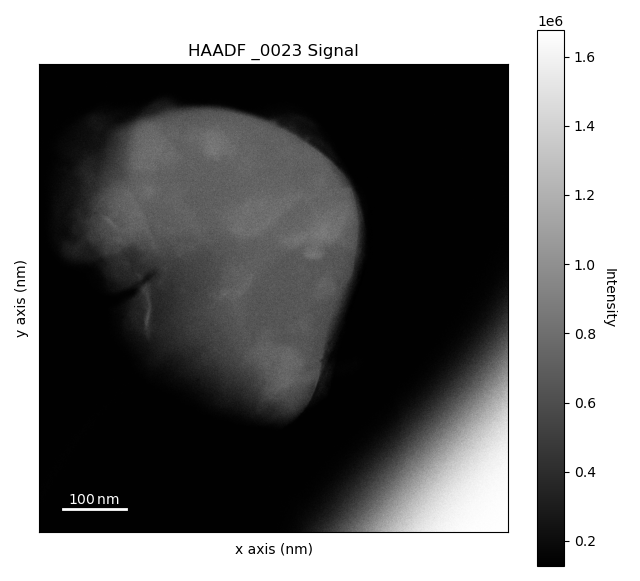

In [11]:
image.plot()

In [12]:
image.axes_manager

Signal axis name,size,,offset,scale,units
x,1024,,-0.0,0.7246659398078918,nm
y,1024,,-0.0,0.7246659398078918,nm


In [13]:
edx = hs.load('EDS Data 1.rpl')

In [14]:
edx = edx.transpose()
edx

<Signal1D, title: , dimensions: (512, 512|2048)>

In [15]:
edx.set_signal_type('EDS_TEM')

In [16]:
edx

<EDSTEMSpectrum, title: , dimensions: (512, 512|2048)>

<IPython.core.display.Javascript object>


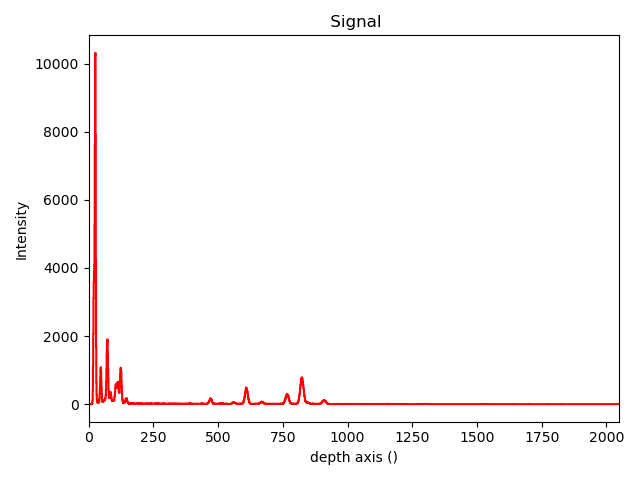

In [17]:
edx.sum().plot()

In [18]:
edx.axes_manager

Navigation axis name,size,index,offset,scale,units
width,512,0,0.0,1.0,
height,512,0,0.0,1.0,
Signal axis name,size,,offset,scale,units
depth,2048,,0.0,1.0,


**Sorting out the axes / calibrations / scales**

In [19]:
edx.axes_manager['depth'].name = 'Energy'

In [20]:
edx.axes_manager['Energy'].scale = 0.01
edx.axes_manager['Energy'].units = 'keV'

In [21]:
edx.axes_manager['width'].name = 'x'
edx.axes_manager['height'].name = 'y'

**Setting the pixel size calibration. Factor two because the HAADF image is 1024 by 1024 and the map is 512 by 512 pixels.**

In [22]:
edx.axes_manager['x'].scale = image.axes_manager['x'].scale*2
edx.axes_manager['y'].scale = image.axes_manager['y'].scale*2

In [23]:
edx.axes_manager['x'].units = 'nm'
edx.axes_manager['y'].units = 'nm'

In [24]:
edx.axes_manager

Navigation axis name,size,index,offset,scale,units
x,512,0,0.0,1.4493318796157837,nm
y,512,0,0.0,1.4493318796157837,nm
Signal axis name,size,,offset,scale,units
Energy,2048,,0.0,0.01,keV


<IPython.core.display.Javascript object>


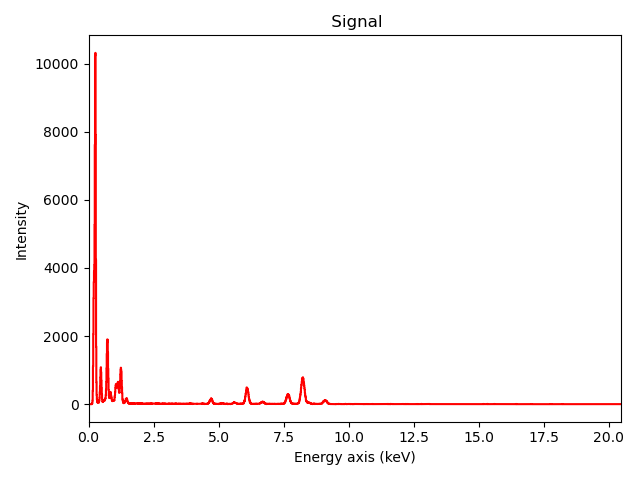

In [25]:
edx.sum().plot()

**Calibrating using Cu-Kalpha line**

In [26]:
edx.axes_manager['Energy'].offset = -0.19

In [27]:
edx.add_elements(('Cu', 'Na', 'O', 'Ti', 'Cr', 'Mn', 'Co', 'Ni'))

In [28]:
edx.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       └── Stage
│           └── tilt_alpha = 0.0
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.ripple
│   │       ├── operation = load
│   │       └── timestamp = 2022-08-09T08:48:03.275800+00:00
│   ├── date = 
│   ├── original_filename = EDS Data 1.rpl
│   ├── time = 
│   └── title = 
├── Sample
│   └── elements = ['Co', 'Cr', 'Cu', 'Mn', 'Na', 'Ni', 'O', 'Ti']
└── Signal
    └── signal_type = EDS_TEM

In [29]:
image.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Stage
│       │   ├── tilt_alpha = 21.420000076293945
│       │   ├── tilt_beta = 8.15999984741211
│       │   ├── x = -0.14575490625
│       │   ├── y = 0.14476940625
│       │   └── z = 0.1258308984375
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── camera_length = 60.0
│       ├── dwell_time = 1.2e-05
│       ├── magnification = 250000.0
│       └── microscope = JEOL COM
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.digital_micrograph
│   │       ├── operation = load
│   │       └── timestamp = 2022-08-09T08:47:57.296410+00:00
│   ├── date = 2018-03-14
│   ├── original_filename = HAADF _0023.dm3
│   ├── time = 11:22:53
│   └── title = HAADF _0023
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = Intensity
    └── signal_type =

In [30]:
edx.metadata.Acquisition_instrument.TEM.beam_energy = 200.0

In [31]:
edx.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       └── beam_energy = 200.0
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.ripple
│   │       ├── operation = load
│   │       └── timestamp = 2022-08-09T08:48:03.275800+00:00
│   ├── date = 
│   ├── original_filename = EDS Data 1.rpl
│   ├── time = 
│   └── title = 
├── Sample
│   └── elements = ['Co', 'Cr', 'Cu', 'Mn', 'Na', 'Ni', 'O', 'Ti']
└── Signal
    └── signal_type = EDS_TEM

<IPython.core.display.Javascript object>


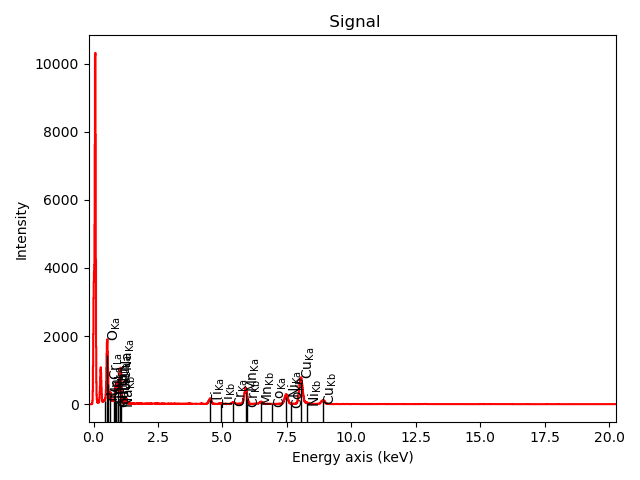

In [32]:
edx.sum().plot(True)

In [33]:
edx.axes_manager

Navigation axis name,size,index,offset,scale,units
x,512,0,0.0,1.4493318796157837,nm
y,512,0,0.0,1.4493318796157837,nm
Signal axis name,size,,offset,scale,units
Energy,2048,,-0.19,0.01,keV


In [34]:
maps = edx.get_lines_intensity()

In [35]:
maps

[<BaseSignal, title: X-ray line intensity of : Co_Ka at 6.93 keV, dimensions: (512, 512|)>,
 <BaseSignal, title: X-ray line intensity of : Cr_Ka at 5.41 keV, dimensions: (512, 512|)>,
 <BaseSignal, title: X-ray line intensity of : Cu_Ka at 8.05 keV, dimensions: (512, 512|)>,
 <BaseSignal, title: X-ray line intensity of : Mn_Ka at 5.90 keV, dimensions: (512, 512|)>,
 <BaseSignal, title: X-ray line intensity of : Na_Ka at 1.04 keV, dimensions: (512, 512|)>,
 <BaseSignal, title: X-ray line intensity of : Ni_Ka at 7.48 keV, dimensions: (512, 512|)>,
 <BaseSignal, title: X-ray line intensity of : O_Ka at 0.52 keV, dimensions: (512, 512|)>,
 <BaseSignal, title: X-ray line intensity of : Ti_Ka at 4.51 keV, dimensions: (512, 512|)>]

<IPython.core.display.Javascript object>


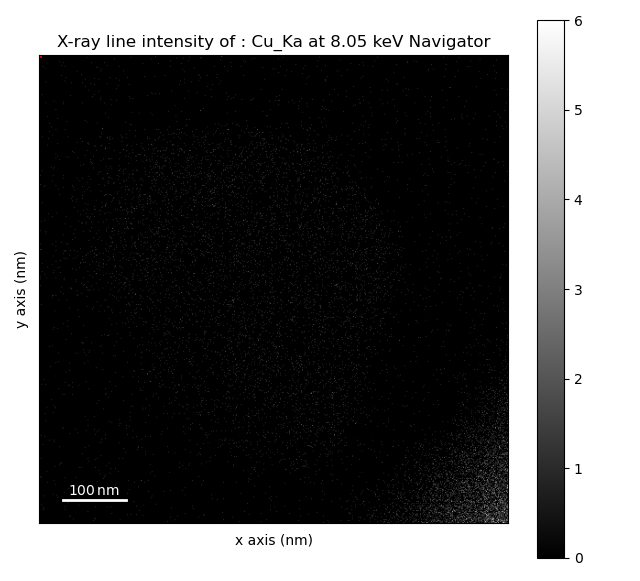

In [36]:
maps[2].plot()

<IPython.core.display.Javascript object>


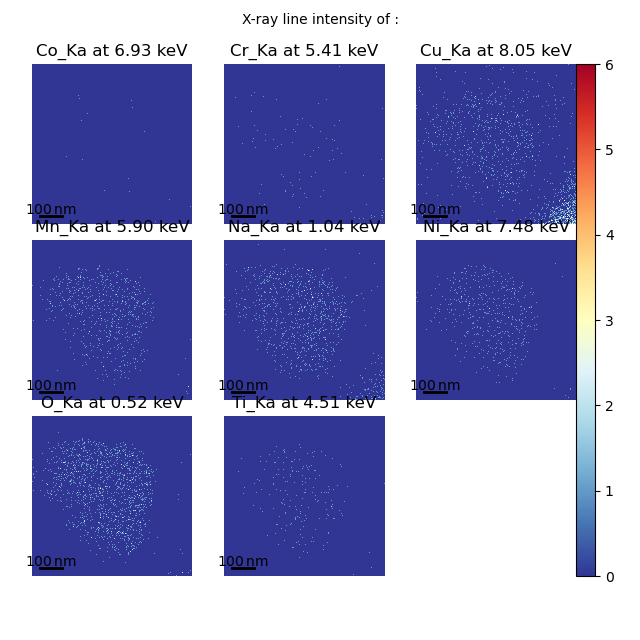

/dls_sw/apps/python/miniforge/4.10.0-0/envs/epsic3.10/lib/python3.10/site-packages/hyperspy/drawing/utils.py:1187: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


[<AxesSubplot:title={'center':'Co_Ka at 6.93 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Cr_Ka at 5.41 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Cu_Ka at 8.05 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Mn_Ka at 5.90 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Na_Ka at 1.04 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Ni_Ka at 7.48 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'O_Ka at 0.52 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Ti_Ka at 4.51 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>]

In [38]:
hs.plot.plot_images(hs.transpose(maps[0], maps[1], maps[2], maps[3], maps[4], maps[5], maps[6], maps[7]),
                    tight_layout=True, cmap='RdYlBu_r', axes_decor='off',
                    colorbar='single', scalebar='all',
                    scalebar_color='black', suptitle_fontsize=10,
                    padding={'top':0.9, 'bottom':0.10, 'left':0.05,
                             'right':0.9, 'wspace':0.20, 'hspace':0.10})

In [39]:
edx_binned = edx.rebin((64,64, 2048))
edx_binned

<EDSTEMSpectrum, title: , dimensions: (64, 64|2048)>

<IPython.core.display.Javascript object>


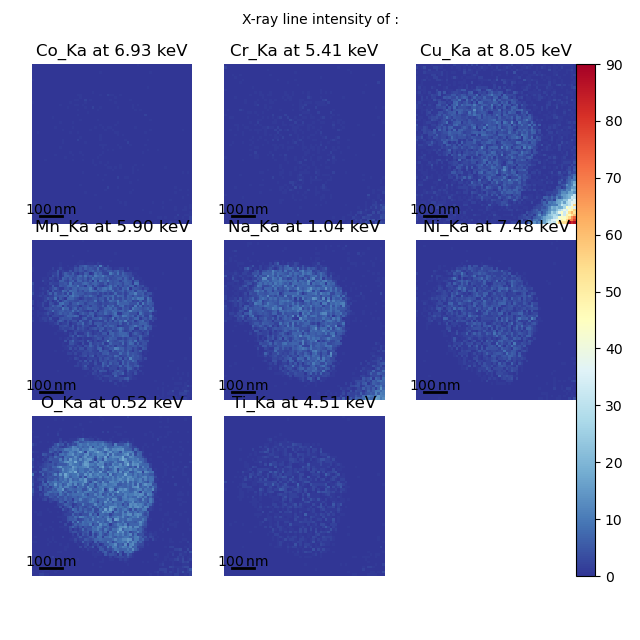

[<AxesSubplot:title={'center':'Co_Ka at 6.93 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Cr_Ka at 5.41 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Cu_Ka at 8.05 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Mn_Ka at 5.90 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Na_Ka at 1.04 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Ni_Ka at 7.48 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'O_Ka at 0.52 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Ti_Ka at 4.51 keV'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>]

In [40]:
maps_bin = edx_binned.get_lines_intensity()
hs.plot.plot_images(hs.transpose(maps_bin[0], maps_bin[1], maps_bin[2], maps_bin[3], maps_bin[4], maps_bin[5], maps_bin[6], maps_bin[7]),
                    tight_layout=True, cmap='RdYlBu_r', axes_decor='off',
                    colorbar='single', scalebar='all',
                    scalebar_color='black', suptitle_fontsize=10,
                    padding={'top':0.9, 'bottom':0.10, 'left':0.05,
                             'right':0.9, 'wspace':0.20, 'hspace':0.10})